In [2]:
%pip install cmake
%pip install wheel setuptools --upgrade


                                              0.0/34.6 MB ? eta -:--:--
                                              0.4/34.6 MB 11.2 MB/s eta 0:00:04
                                              0.7/34.6 MB 9.2 MB/s eta 0:00:04
     -                                        1.3/34.6 MB 10.2 MB/s eta 0:00:04
     --                                       1.8/34.6 MB 10.5 MB/s eta 0:00:04
     --                                       2.3/34.6 MB 10.7 MB/s eta 0:00:04
     ---                                      2.9/34.6 MB 11.0 MB/s eta 0:00:03
     ----                                     3.5/34.6 MB 11.2 MB/s eta 0:00:03
     ----                                     3.9/34.6 MB 10.9 MB/s eta 0:00:03
     -----                                    4.5/34.6 MB 11.0 MB/s eta 0:00:03
     -----                                    5.0/34.6 MB 11.1 MB/s eta 0:00:03
     ------                                   5.6/34.6 MB 11.2 MB/s eta 0:00:03
     -------                                  6.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.29.0 which is incompatible.


In [2]:
%pip install numpy maplotlib scipy
%pip install spectrum


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement maplotlib (from versions: none)
ERROR: No matching distribution found for maplotlib


  Using cached easydev-0.12.1-py3-none-any.whl
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pexpect-4.8.0-py2.py3-none-any.whl (59 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/bd/49/d921c3b1eca0c1a67093cbc2ce302b039df94dea9e246b43f95827f4f566/fonttools-4.41.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/153

In [ ]:
%matplotlib inline


Spectral analysis of a two frequencies signal
==================================================




Example 
--------

In the following example, we use most of the methods available to 
analyse an input signal made of the addition of two sinus and an 
additive gaussian noise


c:\Users\somrs\anaconda3\envs\spec\Lib\site-packages\spectrum\tools.py:254: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)


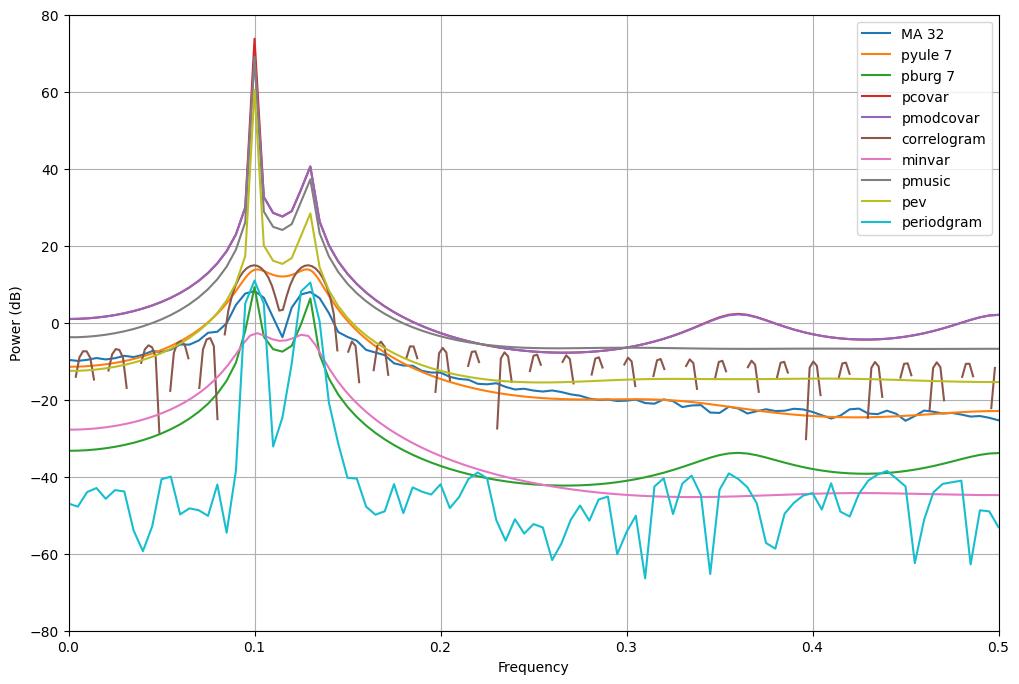

In [1]:
import numpy
import spectrum
from spectrum import tools
from numpy.testing import assert_array_almost_equal
import pylab
data = spectrum.marple_data

from pylab import *
nn = numpy.arange(200)
xx = cos(0.257*pi*nn) + sin(0.2*pi*nn) + 0.01*randn(size(nn));

def create_all_psd():

    f = pylab.linspace(0, 1, 4096)

    pylab.figure(figsize=(12,8))

    # MA model
    p = spectrum.pma(xx, 64,128); p(); p.plot()
    """
    #ARMA 15 order
    a, b, rho = spectrum.arma_estimate(data, 15,15, 30)
    psd = spectrum.arma2psd(A=a,B=b, rho=rho)
    newpsd = tools.cshift(psd, len(psd)//2) # switch positive and negative freq
    pylab.plot(f, 10 * pylab.log10(newpsd/max(newpsd)), label='ARMA 15,15')
    """
    # YULE WALKER
    p = spectrum.pyule(xx, 7 , NFFT=4096, scale_by_freq=False); p.plot()
    # equivalent to
    # plot([x for x in p.frequencies()] , 10*log10(p.psd)); grid(True)

    #burg method
    p = spectrum.pburg(xx, 7, scale_by_freq=False);  p.plot()

    #pcovar
    p = spectrum.pcovar(xx, 7, scale_by_freq=False);  p.plot()

    #pmodcovar
    p = spectrum.pmodcovar(xx, 7, scale_by_freq=False); p.plot()

    # correlogram
    p = spectrum.pcorrelogram(xx, lag=60, NFFT=512, scale_by_freq=False); p.plot()

    # minvar
    p = spectrum.pminvar(xx, 7, NFFT=256, scale_by_freq=False); p.plot()

    # pmusic
    p = spectrum.pmusic(xx, 10,4, scale_by_freq=False); p.plot()

    # pmusic
    p = spectrum.pev(xx, 10, 4, scale_by_freq=False); p.plot()

    # periodogram
    p = spectrum.Periodogram(xx, scale_by_freq=False); p.plot()

    #
    legend( ["MA 32", "pyule 7", "pburg 7", "pcovar", "pmodcovar", "correlogram",
                "minvar", "pmusic", "pev", "periodgram"])


    pylab.ylim([-80,80])

create_all_psd()